In [2]:
#package imports
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
#data import
df = pd.read_csv('player_all_time.csv')

#show first few rows
print(df.head(5))

   Unnamed: 0          Player    G  GLS   GPG  AST   APG  BLK   BPG  + / -  \
0           0   Cameron Brock  120  504  4.20  230  1.92   48  0.40    570   
1           1     Keenan Plew  116  286  2.47  358  3.09   32  0.28    455   
2           2      Matt Smith   81  266  3.28  132  1.63   45  0.56    360   
3           3    Matt Stevens  101  259  2.56   42  0.42   29  0.29    291   
4           4  Cameron Harris  103  258  2.50  301  2.92  109  1.06    446   

   +/- PG   CMP    CPG  CMP %    PP    PPG  
0    4.75  1527  12.73   90.0  2523  21.03  
1    3.92  3584  30.90   95.2  2426  20.91  
2    4.44  1580  19.51   96.5  1678  20.72  
3    2.88   686   6.79   95.8  1532  15.17  
4    4.33  1846  17.92   90.9  2163  21.00  


In [17]:
#describe data

df.describe()

,Unnamed: 0,G,GLS,GPG,AST,APG,BLK,BPG,+ / -,+/- PG,CMP,CPG,CMP %,PP,PPG
count,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.00000
mean,14.472648,20.164114,21.915536,0.868495,21.875711,0.817466,12.694967,0.532035,32.029759,1.163821,240.470460,9.749239,89.134967,332.470897,14.81295
std,8.667823,17.937079,34.599173,0.779689,36.422258,0.821713,17.993022,0.400081,54.891630,1.261277,367.930407,9.047265,13.933888,362.918564,5.75148
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-37.000000,-3.630000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,7.000000,8.000000,3.000000,0.330000,2.000000,0.230000,2.000000,0.250000,2.000000,0.330000,30.000000,3.310000,88.000000,86.000000,11.22000
50%,14.000000,14.000000,9.000000,0.670000,8.000000,0.580000,7.000000,0.480000,12.000000,1.000000,100.000000,6.870000,91.400000,205.000000,15.00000
75%,22.000000,28.000000,27.000000,1.200000,25.000000,1.170000,16.000000,0.730000,39.000000,1.780000,282.000000,13.400000,94.400000,454.000000,18.90000
max,29.000000,120.000000,504.000000,5.800000,358.000000,6.240000,171.000000,4.500000,570.000000,7.620000,3661.000000,60.000000,100.000000,2523.000000,32.25000


In [49]:
#drop unnecessary column
df = df.drop(labels=['Unnamed: 0'], axis=1)
df.shape

(2285, 15)

<AxesSubplot:>

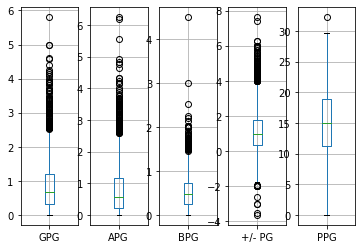

In [37]:
#box plots for [goals, assists, blocks, +/-, points played] per game
fig, axs = plt.subplots(1, 5)

df.boxplot('GPG', ax=axs[0])
df.boxplot('APG', ax=axs[1])
df.boxplot('BPG', ax=axs[2])
df.boxplot('+/- PG', ax=axs[3])
df.boxplot('PPG', ax=axs[4])


There seem to be a good number of outliers in the XYZ per game categories. Let's look at how many players have zero games played and/or zero points played

In [47]:
#games played in ascending order
df['G'].value_counts().sort_index(ascending=True)

#points played in ascending order
df['PP'].value_counts().sort_index(ascending=True)

0        2
1        4
2       15
3        2
4        6
        ..
2287     1
2301     1
2419     1
2426     1
2523     1
Name: PP, Length: 814, dtype: int64

Only two players had 0 points played. Who were these players?

In [48]:
zero_pp = df[df['PP']==0]
zero_pp.head()

,Player,G,GLS,GPG,AST,APG,BLK,BPG,+ / -,+/- PG,CMP,CPG,CMP %,PP,PPG
2133,Scott Boehm,2,0,0.0,0,0.0,0,0.0,0,0.0,0,0.00,0.0,0,0.0
2271,Chris Malackany,9,0,0.0,0,0.0,0,0.0,0,0.0,1,0.11,100.0,0,0.0


Looks like Scott Boehm and Chris Malackany each never played a point. This makes sense for Scott Boehm because he doesn't have any stats. Somehow, Chris Malackany has one completion in his 9 games, but he has never played a game. Normally I'd drop such an anomaly, but I don't think it'll affect the data too much.

<AxesSubplot:>

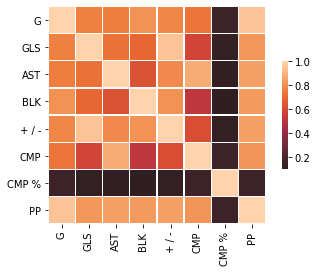

In [70]:
#lets look at the correlation between stats before normalization
dep_df = df.drop(labels=['Player', 'GPG', 'APG', 'BPG', '+/- PG', 'CPG', 'PPG'], axis=1, index=None)

sns.heatmap(dep_df[['G', 'GLS', 'AST', 'BLK', '+ / -', 'CMP', 'CMP %', 'PP']].corr(), center=0, robust=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

Lots of correlation between '+/-' and GLS (duh), also between games playes 'G' and points played 'PP'. Let's look at this for the entire set of data

<AxesSubplot:>

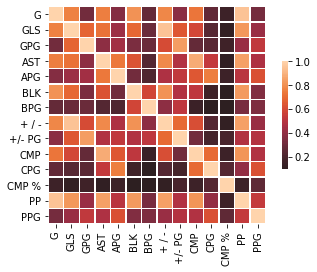

In [75]:
sns.heatmap(df.corr(), center=0, robust=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

what this tells me is that there's little correlation between X and X per game stats. This intuitively makes sense because everything in the 'per game' category is normalized. If we wanted to compare everyone else on an entirely different plane, we could create 'per point' columns that show how affective players are on a given point.

array([<AxesSubplot:title={'center':'PPG'}>], dtype=object)

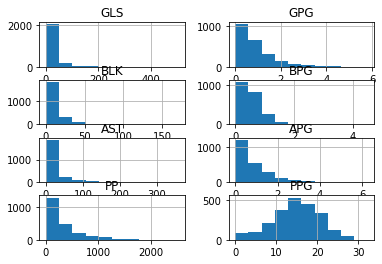

In [90]:
#Let's look at distributions of the 4 primary stats (GLS, AST, BLK, CMP) v. their per game dist
fig, axs = plt.subplots(4, 2)

df.hist('GLS', ax=axs[0, 0])
df.hist('GPG', ax=axs[0, 1])
df.hist('BLK', ax=axs[1, 0])
df.hist('BPG', ax=axs[1, 1])
df.hist('AST', ax=axs[2, 0])
df.hist('APG', ax=axs[2, 1])
df.hist('PP', ax=axs[3, 0])
df.hist('PPG', ax=axs[3, 1])

<AxesSubplot:xlabel='G', ylabel='GPG'>

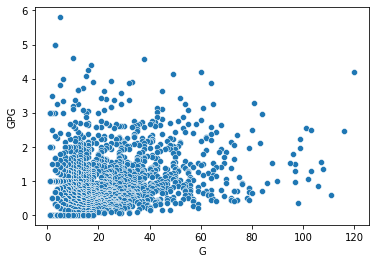

In [98]:
# scatter num_games v. ppg -> linear regression w/ highlights
    # https://stackoverflow.com/questions/7908636/possible-to-make-labels-appear-when-hovering-over-a-point-in-matplotlib

sns.scatterplot(data=df, x='G', y='GPG')